In [1]:
import array_calculus as a
import numpy as np

# Calculating the Derivative from Matrix
Morgan Holve

## Introduction
There are multiple ways to calculate the derivative of a function at a point $x$. One such was is $$f'(x) = \frac{df}{dx}(x) = Df(x) \equiv \lim_{h \to 0} \frac{f(x+h) - f(x)}{(x + h) - x} = \lim_{h\to 0} \frac{f(x) - f(x - h)}{x - (x - h)} = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{(x+h)-(x-h)}$$
The left-most equation is what is called the forward difference, followed by the backward difference and then the central difference. For this notebook, all derivatives are calculated with the central difference as it provides the most accurate results. 
We may put these values into a matrix and multiply them by their gradient in order to get the derivative of the function. To properly put these values into a matrix, we account for the differences amongst the values.


The first side must be calculated with $$Df(x) = \frac{f(dx)-f(0)}{dx}$$

The interior points use $$Df(x)= \frac{f((n+1)dx)-f((n-1)dx)}{2dx}$$

The final side will be determined by $$Df(x)= \frac{f(\frac{b-a}{dx})-f(((\frac{b-a}{dx})-1)dx)}{dx}$$

### Derivatives Using Coded Gradient Function
We will be calculating the derivatives of three different functions; $f(x) = x^2$, $f(x)=\sin(x)$ and $f(x)=\frac{e^{-x^2\2}}{\sqrt{2\pi}}$. These will be computed over the range $0 \leq x < 10$ and for $dx = .01$. The graphs appear in the order in which they are listed.

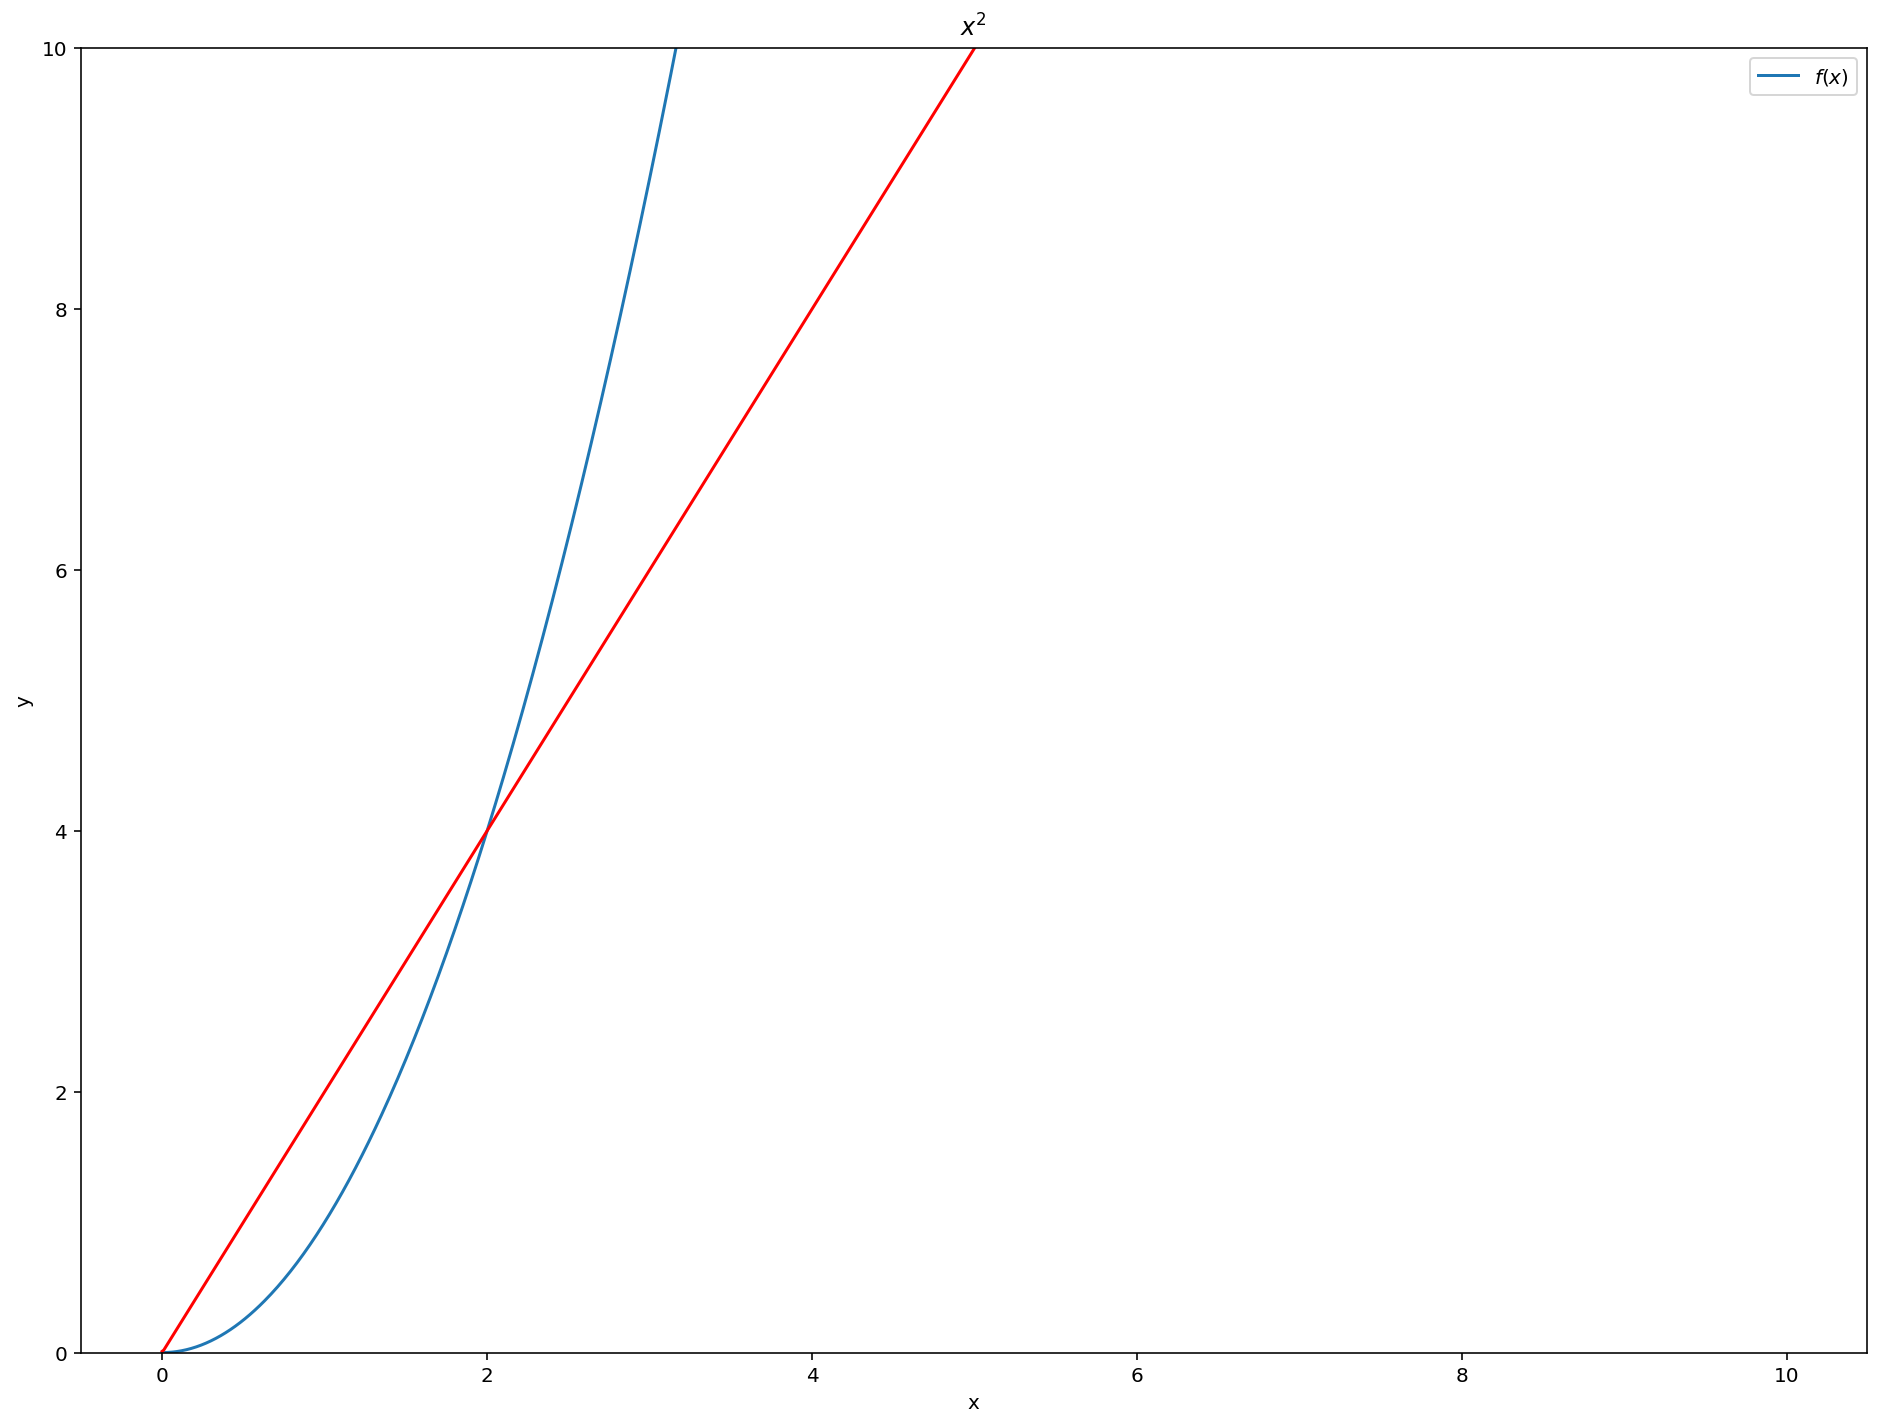

In [2]:
a.squared_plot() #Graphs the function f(x) = x**2 and its derivativee graph 

__Function 1: $$f(x) = x^2$$__


As we can see, the graph of our gradient calculation turns out to be $2x$, which is the known derivative of $x^2$. However, in bottom left hang corner we can see that the derivative differs slightly at the origin. This is due to approximation errors of the gradient.

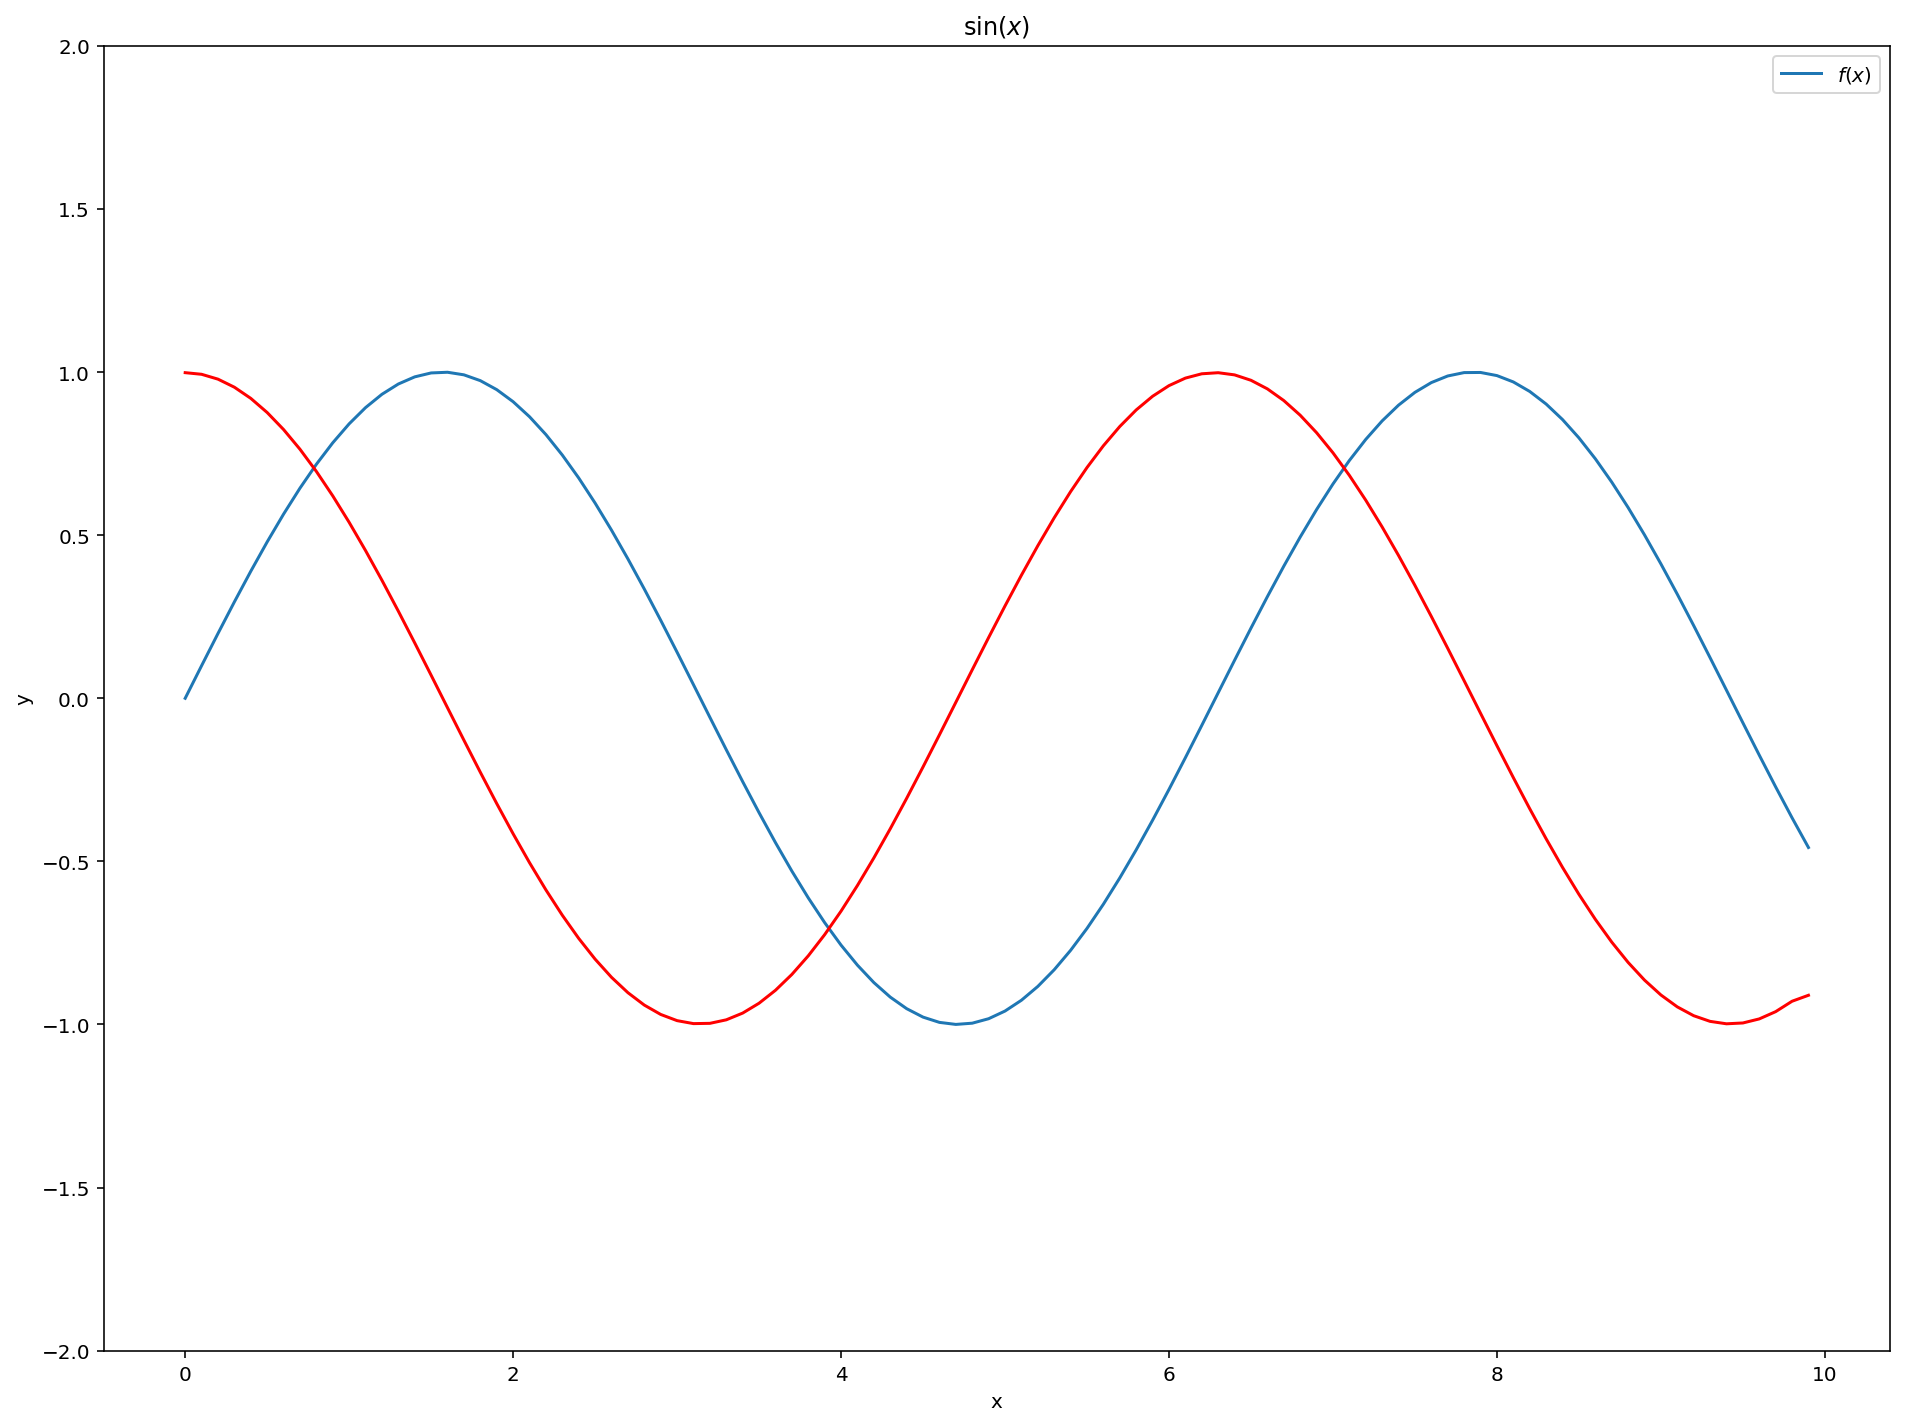

In [3]:
a.sine_plot() #Graphs the function f(x) = sin(x) and its derivative

__Function 2: $f(x)=\sin(x)$__

Like with the plot for $f(x) = x^2$, we can see that the gradient function once again gives us the derivative to $\sin(x)$, which is $\cos(x)$. This is pretty cool because $\sin(x)$ is an oscillating function, showing that the program works also for nonlinear functions.

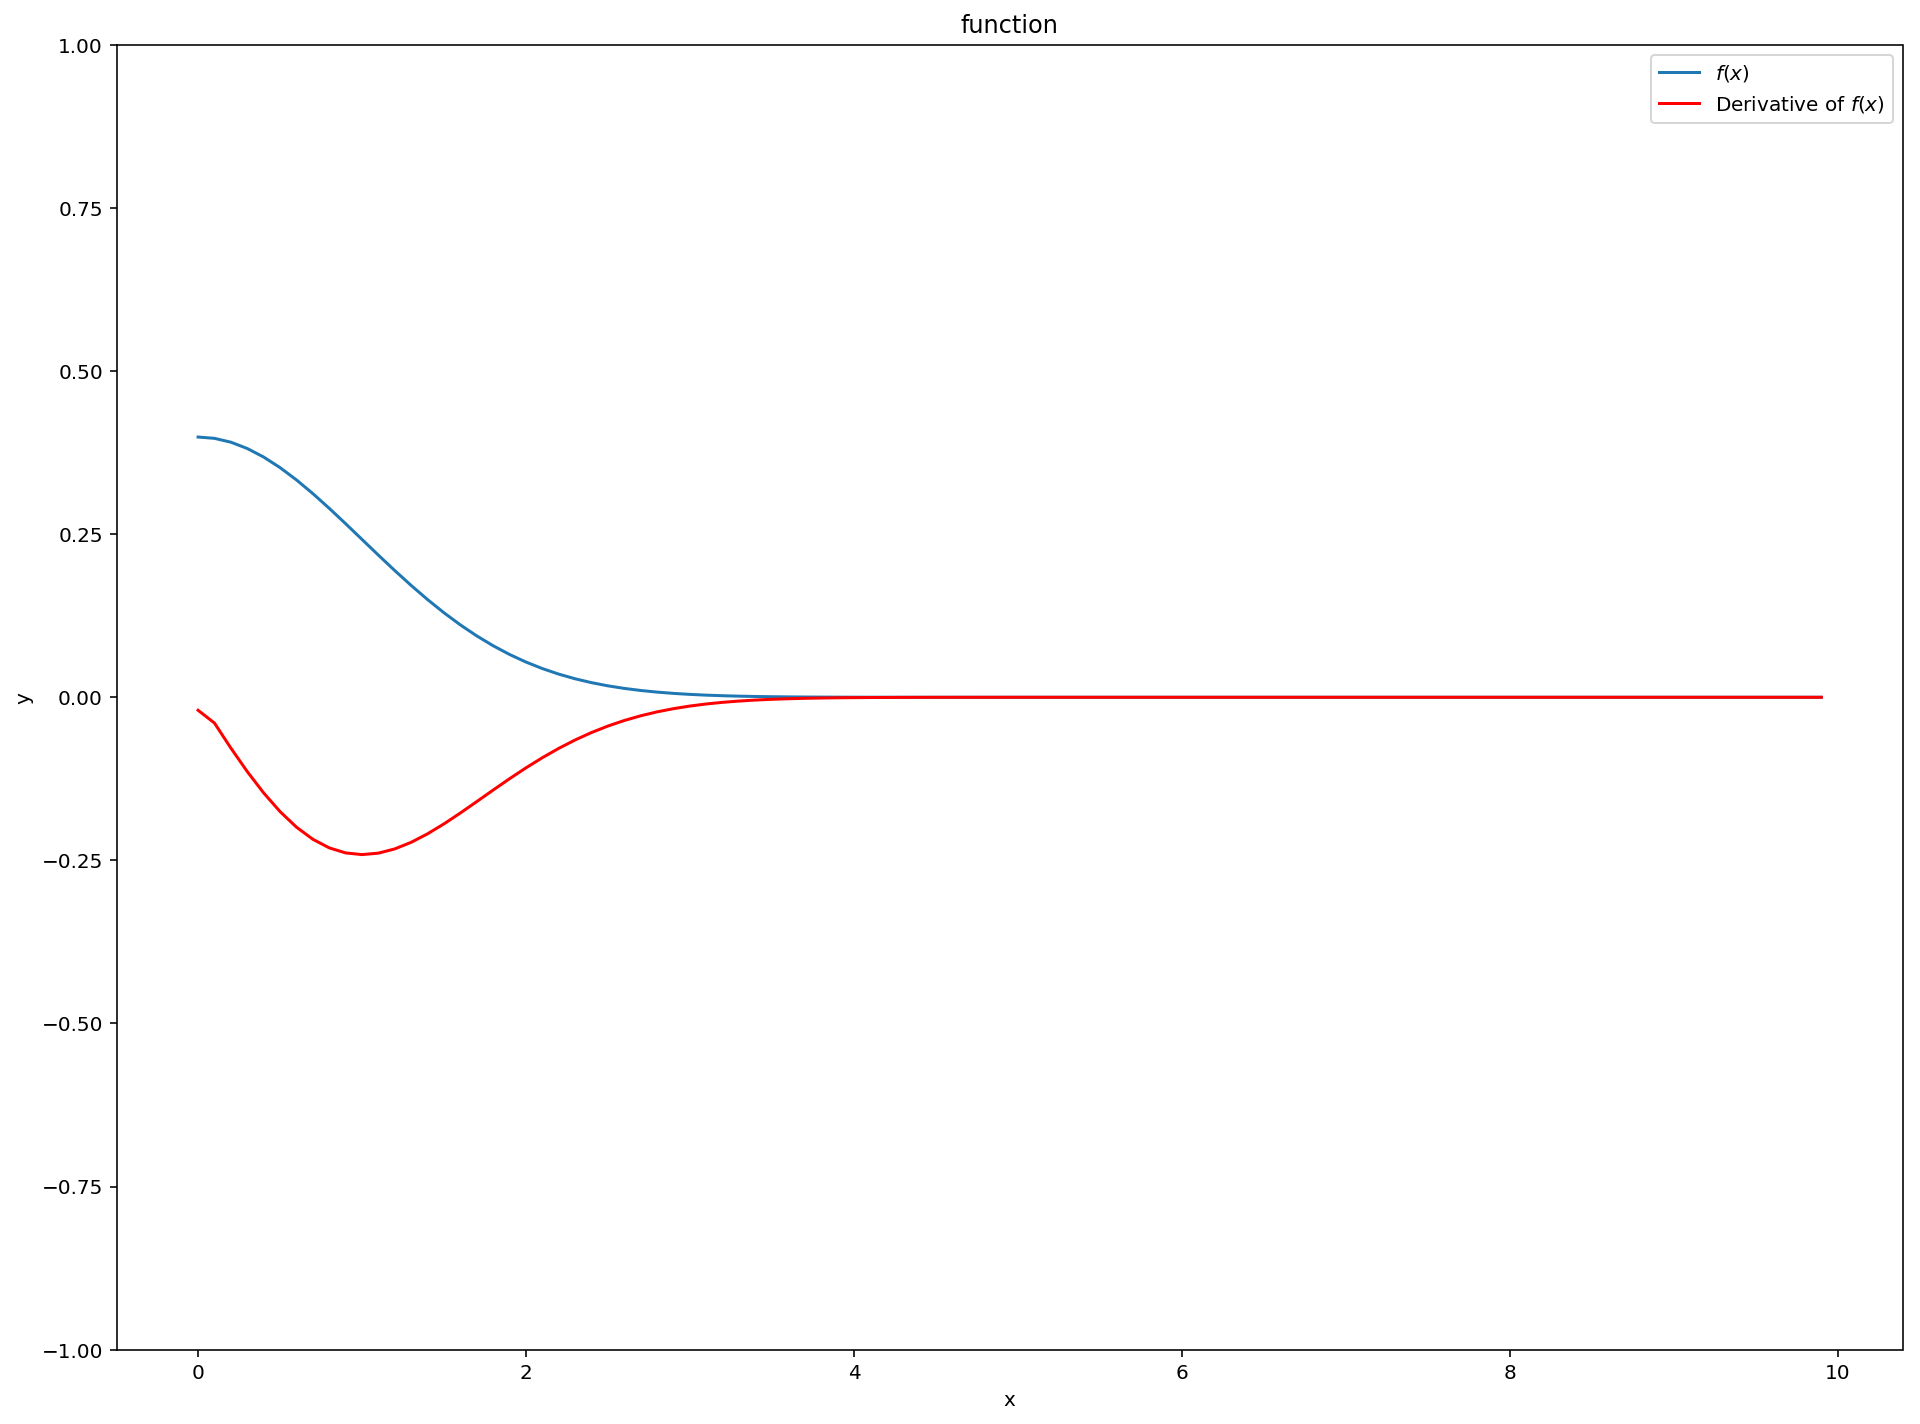

In [4]:
a.exp_plot()#Graphs the function f(x) = e^(-x^2/x)/sqrt(2pi) and its derivative

__Function 3: $f(x)=\frac{\exp{\frac{-x^2}{2}}}{\sqrt{2\pi}}$__

Once again, the gradient produces the derivative of the function. So, now we know that this technique works for not only periodic and linear function, but also those of exponential nature as well. 

## Comparing to the Numpy Gradient Function

Now, we will test if my own coded algorithm produces the same results as the np.gradient() function. We will test this for our three functions.

In [8]:
a.squared_plot_compare()

[0.01 0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28]


In [9]:
x = np.arange(0, 10, .01)
fx = x**2
grad = a.gradient(x)
deriv = grad @ fx
print(deriv[:15])

[0.01 0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28]


As we can see, they return the same values. Yay!

## Second Order Derivatives
We will now see if squaring our gradient function will give us the second derivative.

In [7]:
x = np.arange(0, 10, .01)
fx = x**2
grad = a.gradient(x)
deriv = grad @ fx
print((deriv**2)[:10])

[0.0001 0.0004 0.0016 0.0036 0.0064 0.01   0.0144 0.0196 0.0256 0.0324]


This is obviously not the second derivative as the values are not constant, yet $f''(x)=2$. So, squaring the gradient will not provide the second derivative.